In [1]:
using NRIRHOPM, Plots #, FileIO, Images, Plots, Interpolations, Memento; gr()

  likely near C:\Users\qyp\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\NIfTI\src\NIfTI.jl:88


In [2]:
Pkg.dir("NRIRHOPM")

"C:\\Users\\qyp\\AppData\\Local\\JuliaPro-0.5.1.1\\pkgs-0.5.1.1\\v0.5\\NRIRHOPM"

In [3]:
fixed = readDIRLab("C:\\Users\\qyp\\Dropbox\\CTdata\\case5_T00-ssm.img", NRIRHOPM.DIRLab4DCT5);

In [4]:
moving = readDIRLab("C:\\Users\\qyp\\Dropbox\\CTdata\\case5_T50-ssm.img", NRIRHOPM.DIRLab4DCT5);

In [5]:
originΔ = vecnorm(moving-fixed)

327870.38476507756

In [11]:
displace = [SVector(i,j,k) for i in -1:1, j in -1:1, k in -1:1]
displacements32 = [SVector(i,j,k) for i in -6:6, j in -6:6, k in -6:6]
displacements42 = [SVector(i,j,k) for i in -5:5, j in -5:5, k in -5:5]
displacements64 = [SVector(i,j,k) for i in -4:4, j in -4:4, k in -4:4]
displacements85 = [SVector(i,j,k) for i in -3:3, j in -3:3, k in -3:3]
displacements128 = [SVector(i,j,k) for i in -2:2, j in -2:2, k in -2:2]
# displacementSet = [displacetopo, displacements32, displacements64, displacements128]
displacementSet = [displace, displace, displace, displace, displace, displace]
gridSet = [(32,32,13),(42,42,17),(64,64,26),(85,85,35),(128,128,53),(256,256,106)]
warpped, d, spec, energy = multilevel(fixed, moving, displacementSet, gridSet, MixHOPM(maxIteration=30), SAD(), ones(6), TAD(), [0,0,0,0,0,0])
topologyΔ = vecnorm(warpped[end]-fixed)

[ 2017-03-22T16:18:55 | info ]: Start multilevel processing...
[ 2017-03-22T16:18:55 | info ]: Level 1: 
[ 2017-03-22T16:18:55 | info ]: Image Dimension: (256,256,106)
[ 2017-03-22T16:18:55 | info ]: Grid Dimension: (32,32,13)
[ 2017-03-22T16:18:55 | info ]: Creating data cost with weight=1.0: 
[ 2017-03-22T16:19:03 | info ]:   7.562498 seconds (7 allocations: 5.485 MB)
[ 2017-03-22T16:19:03 | info ]: Creating smooth cost with weight=0: 
[ 2017-03-22T16:19:03 | info ]:   0.012787 seconds (26 allocations: 5.012 MB)
[ 2017-03-22T16:19:03 | info ]: Optimizing via High Order Power Method: 
[ 2017-03-22T16:19:03 | info ]: HOPM converges in 2 steps.
[ 2017-03-22T16:19:03 | info ]:   0.573343 seconds (2.19 k allocations: 38.544 MB, 32.63% gc time)
[ 2017-03-22T16:19:14 | notice ]: 0 outbounds voxels
[ 2017-03-22T16:19:14 | info ]: Level 2: 
[ 2017-03-22T16:19:14 | info ]: Image Dimension: (256,256,106)
[ 2017-03-22T16:19:14 | info ]: Grid Dimension: (42,42,17)
[ 2017-03-22T16:19:14 | info ]: 

123553.97923821656

In [12]:
vecnorm(warpped[end]-fixed) - originΔ

-204316.405526861

In [12]:
displacetopo = [SVector(i,j,k) for i in -2:2, j in -2:2, k in -2:2]
displacements32 = [SVector(i,j,k) for i in -5:5, j in -5:5, k in -5:5]
displacements42 = [SVector(i,j,k) for i in -4:4, j in -4:4, k in -4:4]
displacements64 = [SVector(i,j,k) for i in -3:3, j in -3:3, k in -3:3]
displacements85 = [SVector(i,j,k) for i in -2:2, j in -2:2, k in -2:2]
displacements128 = [SVector(i,j,k) for i in -1:1, j in -1:1, k in -1:1]
displacementSet = [displacetopo, displacements32, displacements42, displacements64, displacements85, displacements128]
gridSet = [(32,32,26),(32,32,13),(42,42,17),(64,64,26),(85,85,35),(128,128,53)]
warpped, d, spec, energy = multilevel(fixed, moving, displacementSet, gridSet, 
α=1, β=2, χ=0, method=MixHOPM(maxIteration=50))
topologyΔ = vecnorm(warpped[end]-fixed)

[ 2017-03-21T19:06:33 | info ]: Start multilevel processing...
[ 2017-03-21T19:06:33 | info ]: Level 1: 
[ 2017-03-21T19:06:33 | info ]: Image Dimension: (256,256,106)
[ 2017-03-21T19:06:33 | info ]: Grid Dimension: (32,32,13)
[ 2017-03-21T19:06:33 | info ]: Creating data cost with weight=1: 
[ 2017-03-21T19:11:03 | info ]: 270.478990 seconds (7 allocations: 270.360 MB, 0.12% gc time)
[ 2017-03-21T19:11:03 | info ]: Creating smooth cost with weight=2: 
[ 2017-03-21T19:11:03 | info ]:   0.229259 seconds (28 allocations: 32.033 MB, 7.16% gc time)
[ 2017-03-21T19:11:03 | info ]: Optimizing via High Order Power Method: 
[ 2017-03-21T19:21:07 | info ]: HOPM converges in 4 steps.
[ 2017-03-21T19:23:39 | info ]: 755.324270 seconds (2.35 k allocations: 2.904 GB, 0.21% gc time)
outboudscount = 0
[ 2017-03-21T19:23:50 | info ]: Level 2: 
[ 2017-03-21T19:23:50 | info ]: Image Dimension: (256,256,106)
[ 2017-03-21T19:23:50 | info ]: Grid Dimension: (42,42,17)
[ 2017-03-21T19:23:50 | info ]: Creati

331885.85960710404

In [29]:
sliceNum = 40;

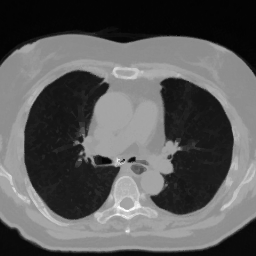

In [30]:
colorview(Gray, warpped[end][:,:,sliceNum] |> x->x/maximum(x))

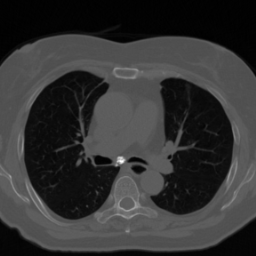

In [31]:
colorview(Gray, fixed[:,:,sliceNum] |> x->x/maximum(x))

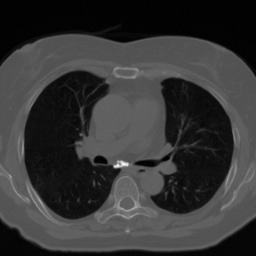

In [32]:
colorview(Gray, moving[:,:,sliceNum] |> x->x/maximum(x))

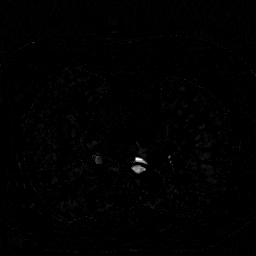

In [33]:
colorview(Gray, warpped[end][:,:,sliceNum]-fixed[:,:,sliceNum] |> x->x/maximum(x))

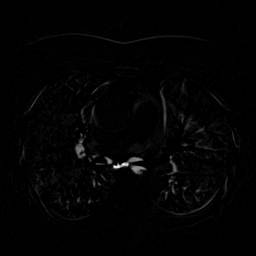

In [34]:
colorview(Gray, moving[:,:,sliceNum]-fixed[:,:,sliceNum] |> x->x/maximum(x))

In [35]:
using MAT

In [34]:
out = warpped[end].data;

In [33]:
matwrite("case5.mat", Dict("case5" => out))


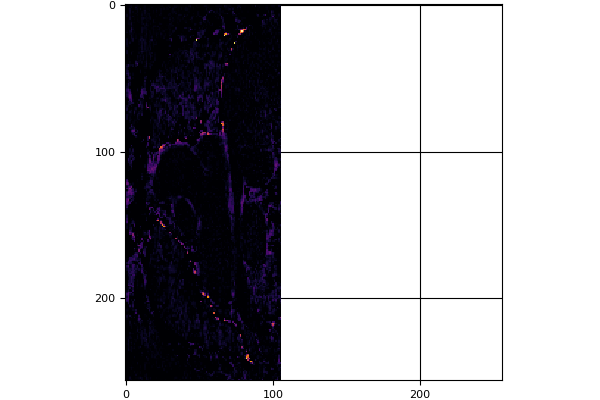

In [19]:
plot(colorview(Gray, warpped[end][120,:,:]-fixed[120,:,:] |> x->x/maximum(x)))

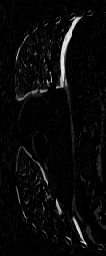

In [17]:
colorview(Gray, moving[120,:,:]-fixed[120,:,:] |> x->x/maximum(x))

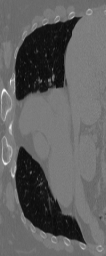

In [15]:
colorview(Gray, fixed[120,:,:] |> x->x/maximum(x))